In [11]:
import os
import sys

path = os.getcwd()
while os.path.basename(os.path.normpath(path)) != 'mejiro':
    path = os.path.dirname(path)
repo_path = path
if repo_path not in sys.path:
    sys.path.append(repo_path)

In [12]:
import numpy as np
import time
import pickle
from pprint import pprint
from tqdm import tqdm
import matplotlib.pyplot as plt
from pandeia.engine.perform_calculation import perform_calculation
from pandeia.engine.calc_utils import build_default_calc, build_default_source
from lenstronomy.Util import data_util
from lenstronomy.SimulationAPI.ObservationConfig.Roman import Roman

from mejiro.helpers import test_physical_lens
from mejiro.pandeia import pandeia_input
from mejiro.pandeia.pandeia_output import PandeiaOutput
from mejiro.plots import diagnostic_plot, plot

plt.style.use(f'{repo_path}/mejiro/mplstyle/science.mplstyle')

In [13]:
csv = os.path.join(repo_path, 'data', 'roman_spacecraft_and_instrument_parameters.csv')
figure_dir = os.path.join(repo_path, 'figures')
array_dir = os.path.join(repo_path, 'output', 'arrays')
pickle_dir = os.path.join(repo_path, 'output', 'pickles')

In [14]:
oversample_factor = 1

physical_lens = test_physical_lens.TestPhysicalLens()
model = physical_lens.get_array(num_pix=45 * oversample_factor)

# plot.plot(filepath=None,
#           title='Test lens model (no noise or PSF)',
#           array=model,
#           colorbar=True)

In [ ]:
calc = pandeia_input.build_pandeia_calc(csv=csv,
                                        array=model,
                                        lens=physical_lens,
                                        band='f106',
                                        oversample_factor=oversample_factor)

In [ ]:
results, execution_time = pandeia_input.get_pandeia_results(calc)
print(f'Execution time: {execution_time}')

In [ ]:
with open(os.path.join(pickle_dir, f'results_{oversample_factor}'), 'ab') as results_file:
    pickle.dump(results, results_file)

In [15]:
with open(os.path.join(pickle_dir, f'results_{oversample_factor}'), 'rb') as results_file:
    results = pickle.load(results_file)

In [16]:
pandeia_output = PandeiaOutput(results)

In [17]:
for keys in pandeia_output.results.keys():
    print(keys)

sub_reports
input
1d
2d
3d
scalar
information
transform
warnings
web_report


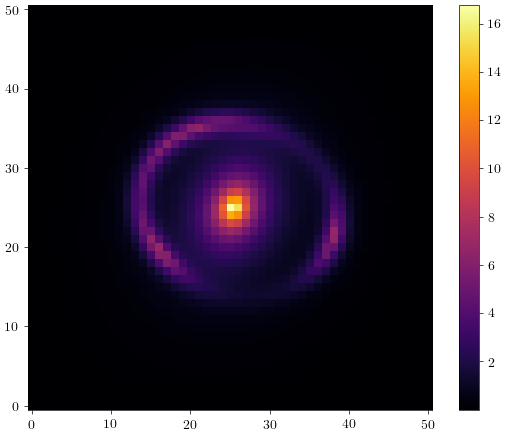

In [18]:
plt.imshow(pandeia_output.get_snr(), cmap='inferno')
plt.colorbar()
plt.show()

In [20]:
pprint(results['scalar'])

{'all_dithers_time': 556.32,
 'aperture_size': 0.2,
 'background': 0.2106318801540442,
 'background_area': 51.927151299004954,
 'background_sky': 6.509933559230822,
 'background_total': 8.18611999885345,
 'brightest_pixel': 1.6720754,
 'contamination': 0.20475957350459006,
 'cr_ramp_rate': 0.013550854268816142,
 'disperser': None,
 'duty_cycle': 0.9836065573770492,
 'exposure_time': 556.32,
 'extracted_flux': 5.425141625693466,
 'extracted_noise': 0.18056036422549804,
 'extraction_area': 10.385430259800994,
 'filter': 'f106',
 'fraction_saturation': 0.015418765,
 'measurement_time': 547.2,
 'reference_wavelength': 1.0492408699061124,
 'sat_ngroups': 591.0,
 'saturation_time': 553.28,
 'sn': 30.046138026826977,
 'total_exposure_time': 556.32,
 'total_integrations': 1,
 'x_offset': 0.0,
 'y_offset': 0.0}


(51, 51, 107)


ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (51,)  and requested shape (51,107)

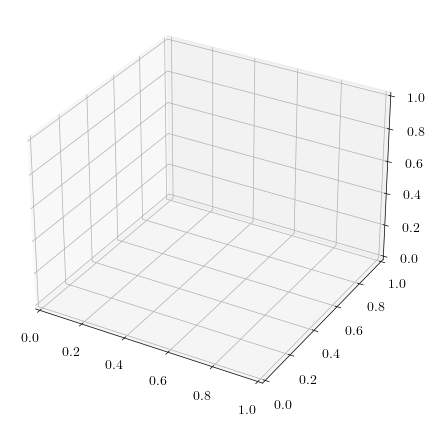

In [19]:
flux = results['3d']['flux']
print(flux[0].shape)

ax = plt.figure().add_subplot(projection='3d')
ax.plot(xs=flux[0][0], ys=flux[0][1], zs=np.zeros(51))

plt.show()